# Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import scipy.stats as stats
import pylab as pl
%matplotlib inline

In [5]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to had
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

scipy==1.1.0
scikit-learn==0.19.1
pandas==0.22.0
numpy==1.15.0
matplotlib==2.2.2


## Data Loading

In [2]:
data = pd.read_csv("steam-200k.csv", header=None)
data.drop(columns=[4], inplace=True)
data.columns = ["userId", "gameName", "state", "value"]

In [3]:
data.head()

,userId,gameName,state,value
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
userId      200000 non-null int64
gameName    200000 non-null object
state       200000 non-null object
value       200000 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ MB


In [5]:
data.describe()

,userId,value
count,2.000000e+05,200000.000000
mean,1.036559e+08,17.874384
std,7.208074e+07,138.056952
min,5.250000e+03,0.100000
25%,4.738420e+07,1.000000
50%,8.691201e+07,1.000000
75%,1.542309e+08,1.300000
max,3.099031e+08,11754.000000


check number of purchased games equals to all games length

In [6]:
len(set(data[data.state=="purchase"]['gameName']))==len(set(data.gameName))

True

Text(0,0.5,'Game State')

/home/mahmoud/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


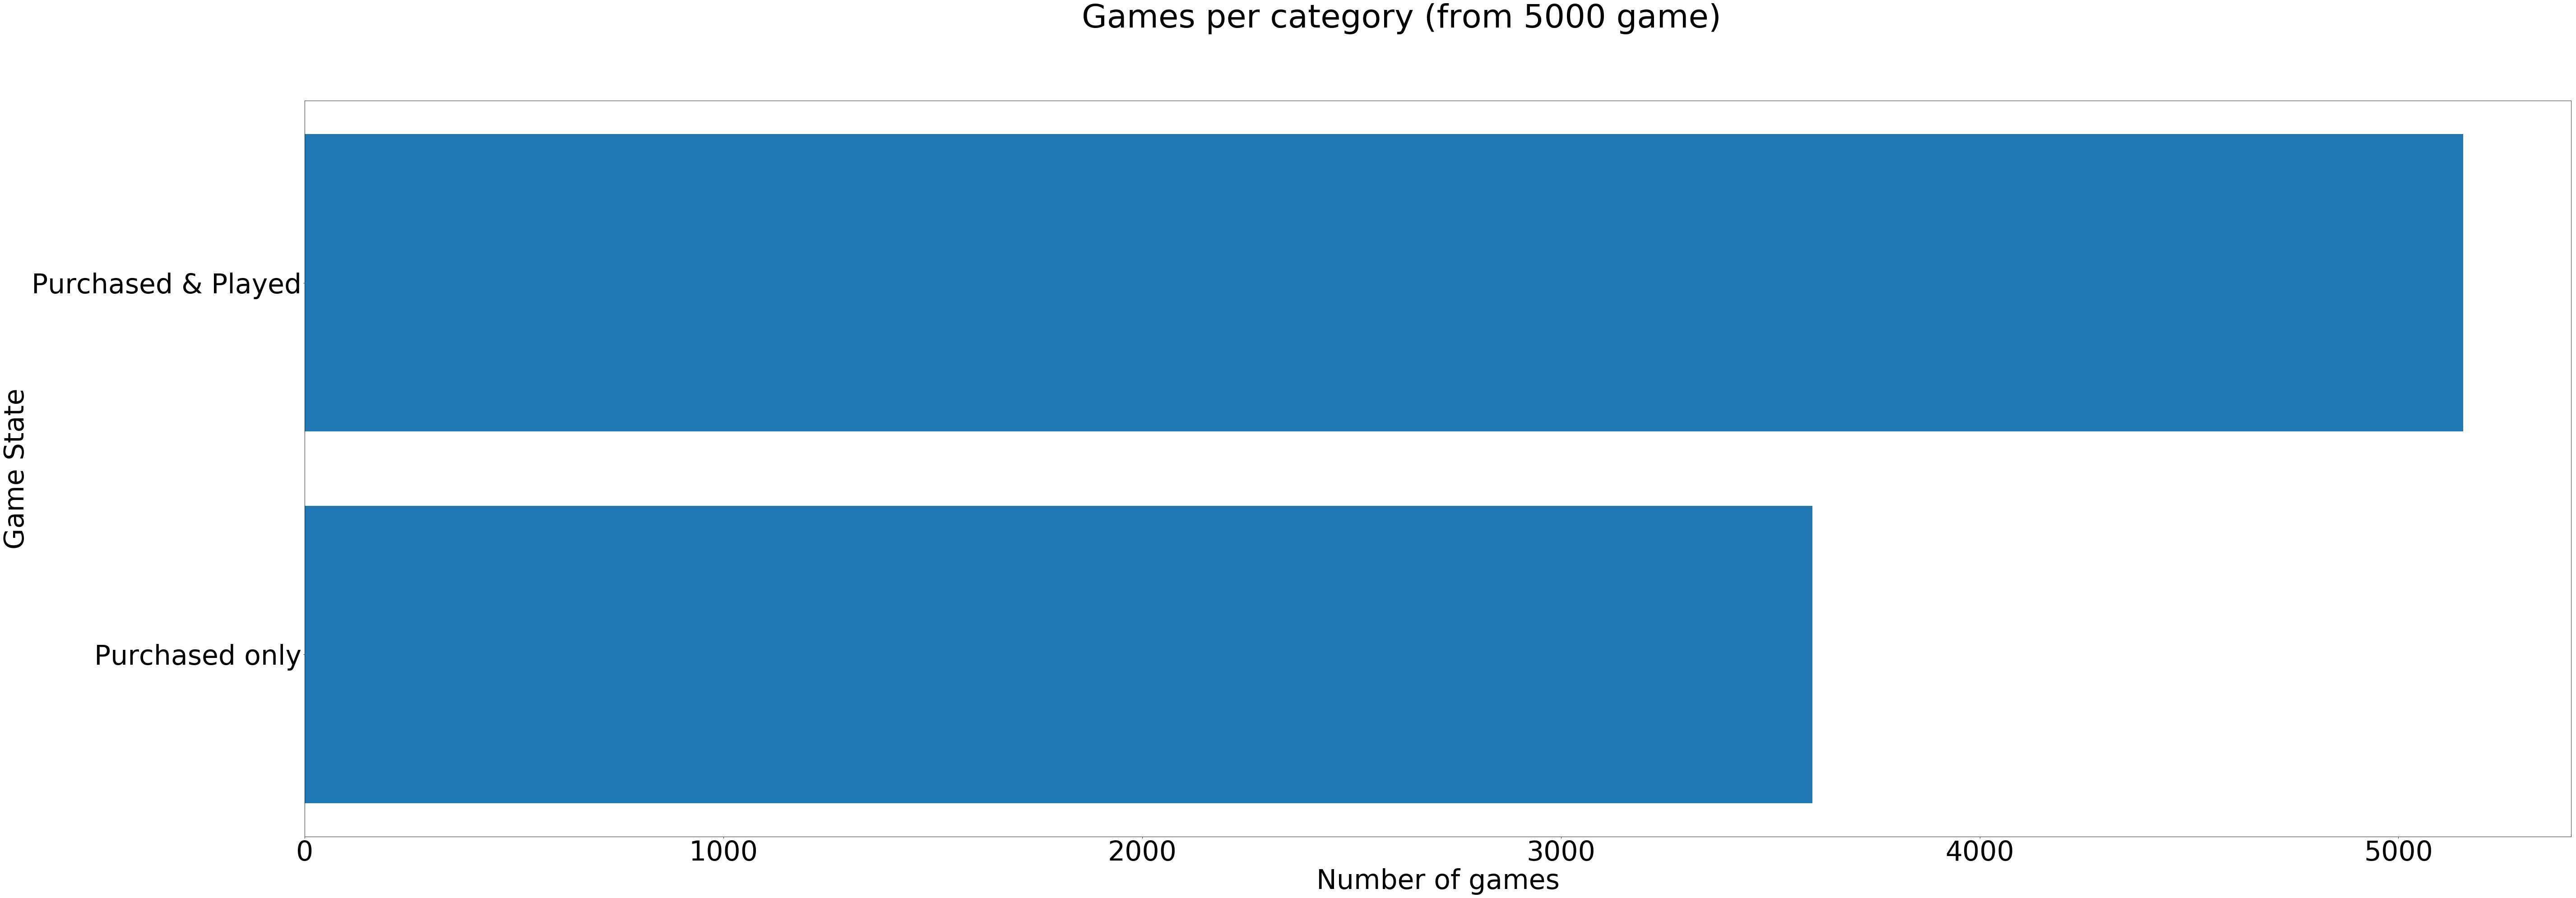

In [13]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 60}

matplotlib.rc('font', **font)

fig, axs = plt.subplots(figsize=(90, 30))
axs.barh(['Purchased only','Purchased & Played'], [len(set(data[data.state=="play"]['gameName'])),len(set(data[data.state=="purchase"]['gameName']))])
fig.suptitle('Games per category (from 5000 game)')
plt.xlabel("Number of games")
plt.ylabel("Game State")

In [7]:
data_played = data.drop(data[data.state != "play"].index)
data_played.drop(columns=["state"], inplace=True)

In [8]:
topPlayedGames=data_played.groupby(by=["gameName"]).mean().sort_values(by=["value"],ascending=False).drop(columns=["userId"])[:20]

Text(0,0.5,'Games Names')

/home/mahmoud/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


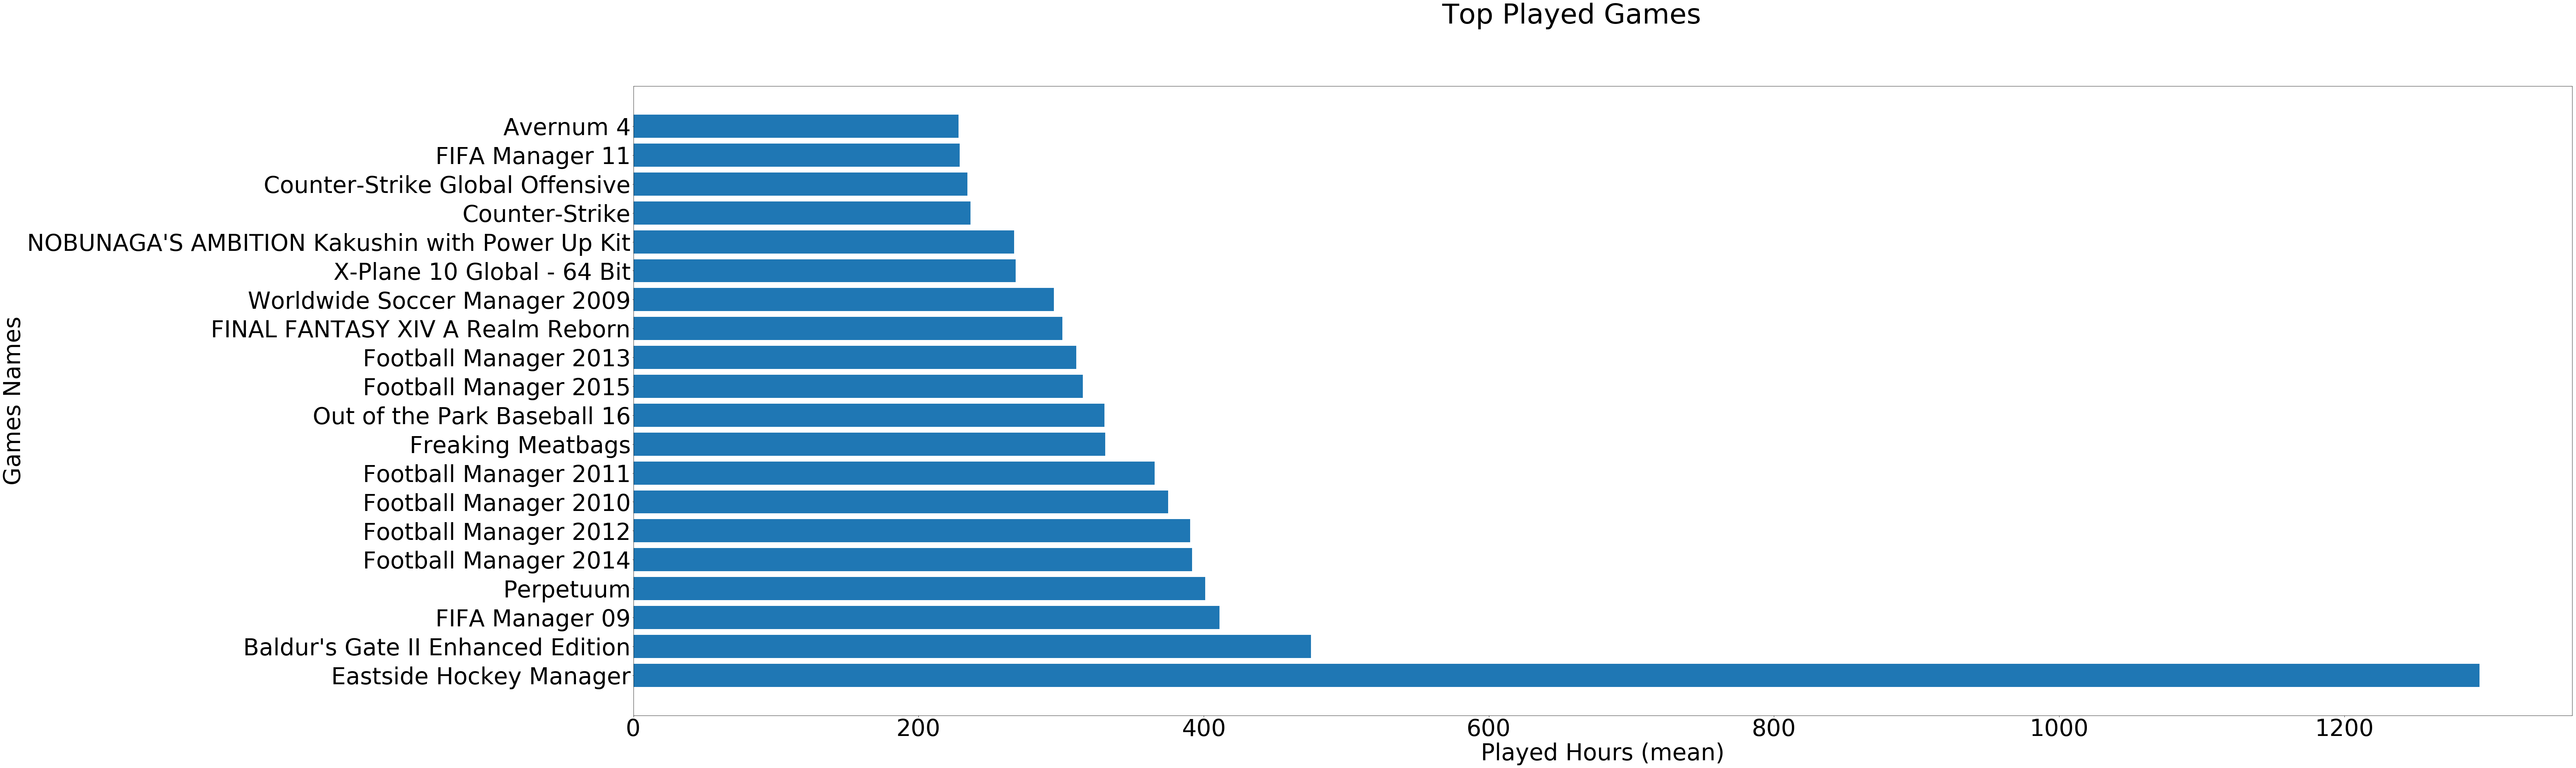

In [9]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 60}

matplotlib.rc('font', **font)
names = list(topPlayedGames.index)
values = list(topPlayedGames['value'])

fig, axs = plt.subplots(figsize=(90, 30))
axs.barh(names, values)
fig.suptitle('Top Played Games')
plt.xlabel("Played Hours (mean)")
plt.ylabel("Games Names")

In [10]:
max_played_value = 100
data_played_len = len(data_played)
data_played.reset_index(inplace=True, drop=True)
for i in range(data_played_len):
    data_played.iloc[i, 2] = min(data_played.iloc[i, 2], max_played_value)

In [75]:
data_played["log_value"] = np.log(data_played['value'])

In [78]:
normlized_series = (data_played['log_value'] - data_played['log_value'].mean())/data_played['log_value'].std()
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(1,5))
x_scaled = min_max_scaler.fit_transform(normlized_series.values.reshape((-1,1)))
normlized_series2 = pd.DataFrame(x_scaled)
data_played["normalized_value"] = normlized_series2
data_played.head()

,userId,gameName,value,log_value,normalized_value
0,151603712,The Elder Scrolls V Skyrim,100.0,4.605170,5.000000
1,151603712,Fallout 4,87.0,4.465908,4.919359
2,151603712,Spore,14.9,2.701361,3.897582
3,151603712,Fallout New Vegas,12.1,2.493205,3.777047
4,151603712,Left 4 Dead 2,8.9,2.186051,3.599187


/home/ayyad/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ayyad/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


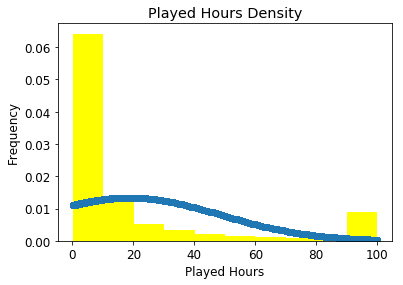

In [100]:
h = sorted(data_played.value.tolist())  #sorted
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
pl.plot(h,fit,'-o')
pl.xlabel('Played Hours')
pl.ylabel('Frequency')
pl.title('Played Hours Density')
pl.hist(h,normed=True, color="Yellow")      #use this to draw histogram of your data
pl.show()                   #use may also need add this 

/home/ayyad/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ayyad/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


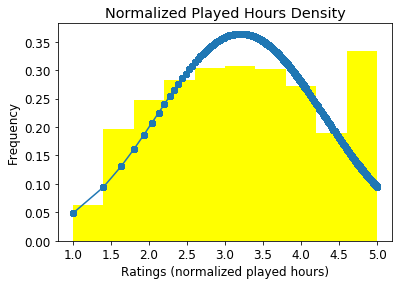

In [101]:
h = sorted(data_played["normalized_value"].tolist())  #sorted
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
pl.plot(h,fit,'-o')
pl.xlabel('Ratings (normalized played hours)')
pl.ylabel('Frequency')
pl.title('Normalized Played Hours Density')
pl.hist(h,normed=True, color="Yellow")      #use this to draw histogram of your data
pl.show()                   #use may also need add this 

In [42]:
data_played.drop(columns=["value", "log_value"], inplace=True)

In [44]:
game_id = 100000
game_dict = {}
for i in range(len(data_played)):
    game_name = data_played.iloc[i]["gameName"]
    if game_name not in game_dict:
        game_dict[game_name] = game_id
        game_id += 1

In [45]:
data_played["gameid"] = np.nan
for i in range(len(data_played)):
    game_name = data_played.iloc[i]["gameName"]
    data_played.loc[i, "gameid"] = game_dict[game_name]

In [49]:
data_played.columns = ["userID", "gameName", "rating", "gameID"]

In [51]:
data_played.to_csv("games_data.csv", index=False)